In [1]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [31]:
import numpy
import matplotlib.pyplot as plt
import toolbox.as_toolbox as ast
from toolbox import vis
import urllib
from mpl_toolkits.mplot3d import Axes3D

In [10]:
f_sig = urllib.request.urlopen("https://www.nbi.dk/~koskinen/Teaching/data/BDT_signal_train.txt")
f_bg = urllib.request.urlopen("https://www.nbi.dk/~koskinen/Teaching/data/BDT_background_train.txt")
f_sig_test = urllib.request.urlopen("https://www.nbi.dk/~koskinen/Teaching/data/BDT_signal_test.txt")
f_bg_test = urllib.request.urlopen("https://www.nbi.dk/~koskinen/Teaching/data/BDT_background_test.txt")

signal = np.loadtxt(f_sig)
bg = np.loadtxt(f_bg)
signal_test = np.loadtxt(f_sig_test)
bg_test = np.loadtxt(f_bg_test)

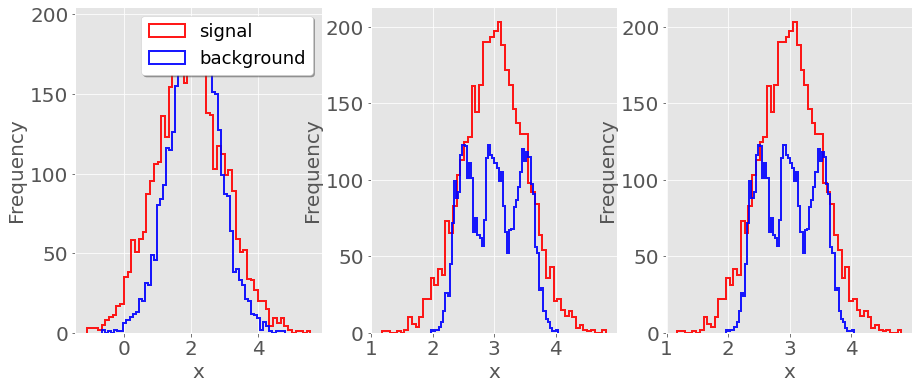

In [60]:
fig, ax = plt.subplots(1,3, figsize = (15,6))
ax = ax.flatten()
x, y, binwidth, _, _ = vis.nice_histogram(
    signal[:,0], 60, show_plot=False, color_hist = 'r', figure = fig, axis = ax[0], data_label_hist='signal')
x, y, binwidth, _,_ = vis.nice_histogram(bg[:,0], 60, show_plot=False, color_hist = 'b', axis = ax[0],
                                        data_label_hist='background', plot_legend=True)

x, y, binwidth, _, _ = vis.nice_histogram(signal[:,1],60, show_plot=False, figure=fig, axis = ax[1], color_hist = 'r')
x, y, binwidth, _, _ = vis.nice_histogram(bg[:,1],60, show_plot=False, figure=fig, axis = ax[1], color_hist = 'b')
x, y, binwidth, _, _ = vis.nice_histogram(signal[:,1],60, show_plot=False, figure=fig, axis = ax[2], color_hist = 'r')
x, y, binwidth, _, _ = vis.nice_histogram(bg[:,1],60, show_plot=False, figure=fig, axis = ax[2], color_hist = 'b',
                                         )
fig

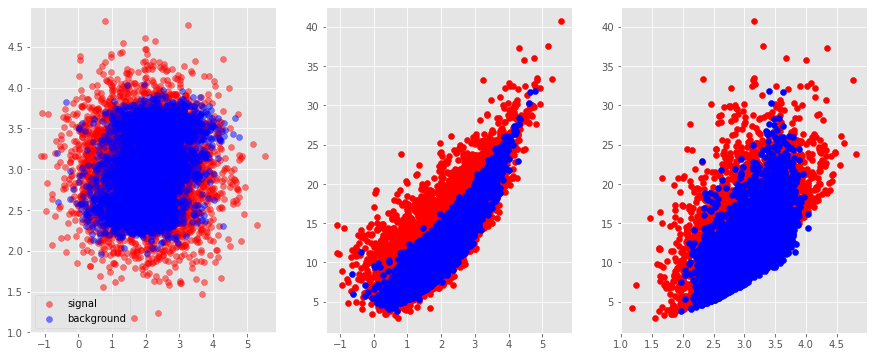

In [64]:
fig, ax = plt.subplots(1,3, figsize = (15,6))
_ = ax[0].scatter(signal[:,0], signal[:,1], color = 'r', label = 'signal')
_ = ax[0].scatter(bg[:,0], bg[:,1], color = 'b', label = 'background')
ax[0].legend()

_ = ax[1].scatter(signal[:,0], signal[:,2], color = 'r')
_ = ax[1].scatter(bg[:,0], bg[:,2], color = 'b')

_ = ax[2].scatter(signal[:,1], signal[:,2], color = 'r')
_ = ax[2].scatter(bg[:,1], bg[:,2], color = 'b')

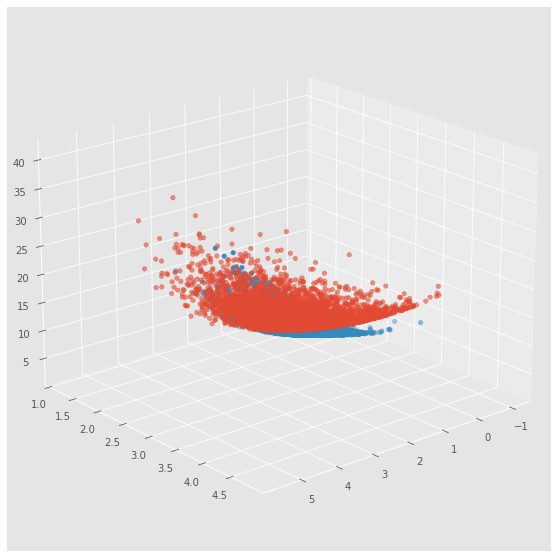

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(signal[:,0], signal[:,1], signal[:,2], marker='o', alpha = .6)
ax.scatter(bg[:,0], bg[:,1], bg[:,2], marker='o')
ax.view_init(elev=20., azim=50)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
y_train_sig = np.zeros(len(signal))+1
y_train_bg = np.zeros(len(bg))
X_train = np.concatenate((signal, bg), axis = 0)
y_train = np.concatenate((y_train_sig,y_train_bg))

In [92]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)